In [2]:
# load needed python libraries matplotlib, numpy, and scikit-rf
import matplotlib.pyplot as plt
import numpy as np
import skrf as rf

In [118]:
cold_ideals_2port = rf.read_all('3Kideals_2port')
warm_ideals_2port = rf.read_all('295Kideals_2port')


In [119]:
cold_ideals_2port

{'ideal_port1_load': 2-Port Network: 'ideal_port1_load',  0.001-20.0 GHz, 10001 pts, z0=[50.+0.j 50.+0.j],
 'ideal_port1_open': 2-Port Network: 'ideal_port1_open',  0.001-20.0 GHz, 10001 pts, z0=[50.+0.j 50.+0.j],
 'ideal_port1_short': 2-Port Network: 'ideal_port1_short',  0.001-20.0 GHz, 10001 pts, z0=[50.+0.j 50.+0.j],
 'ideal_port2_load': 2-Port Network: 'ideal_port2_load',  0.001-20.0 GHz, 10001 pts, z0=[50.+0.j 50.+0.j],
 'ideal_port2_open': 2-Port Network: 'ideal_port2_open',  0.001-20.0 GHz, 10001 pts, z0=[50.+0.j 50.+0.j],
 'ideal_port2_short': 2-Port Network: 'ideal_port2_short',  0.001-20.0 GHz, 10001 pts, z0=[50.+0.j 50.+0.j],
 'ideal_port3_load': 2-Port Network: 'ideal_port3_load',  0.001-20.0 GHz, 10001 pts, z0=[50.+0.j 50.+0.j],
 'ideal_port3_open': 2-Port Network: 'ideal_port3_open',  0.001-20.0 GHz, 10001 pts, z0=[50.+0.j 50.+0.j],
 'ideal_port3_short': 2-Port Network: 'ideal_port3_short',  0.001-20.0 GHz, 10001 pts, z0=[50.+0.j 50.+0.j],
 'ideal_port4_load': 2-Port Net

In [84]:
my_ideals_port1 = [\
    cold_ideals_2port['ideal_port1_short'],
    cold_ideals_2port['ideal_port1_open'],
    cold_ideals_2port['ideal_port1_load'],
    cold_ideals_2port['idealthru']
]

In [86]:
fghz = cold_ideals_2port['idealthru'].f/1e9

In [88]:
cold_thrus_measured = rf.read_all('SOLT_rawdata/5k2')
warm_thrus_measured = rf.read_all('SOLT_rawdata/warm2')

In [90]:
my_measured_cold_port1  = [\
    cold_thrus_measured['short'],
    cold_thrus_measured['open'],
    cold_thrus_measured['load'],
    cold_thrus_measured['port1']
]



In [92]:
cal_port1 = rf.UnknownThru(\
    ideals = my_ideals_port1,
    measured = my_measured_cold_port1,
    )

C:\Users\lfs\AppData\Roaming\Python\Python312\site-packages\skrf\calibration\calibration.py:4113: UserWarning: No switch terms provided
  EightTerm.__init__(self, measured = measured, ideals = ideals,


In [94]:
cal_port1.run()


C:\Users\lfs\AppData\Roaming\Python\Python312\site-packages\skrf\calibration\calibration.py:4139: UserWarning: No switch terms provided
  et = EightTerm(
C:\Users\lfs\AppData\Local\Temp\1\ipykernel_16904\1598462222.py:1: UserWarning: No switch terms provided
  cal_port1.run()


In [96]:
port1_corrected = cal_port1.apply_cal(cold_thrus_measured['port1'])


Text(0.5, 0, 'Frequency [GHz]')

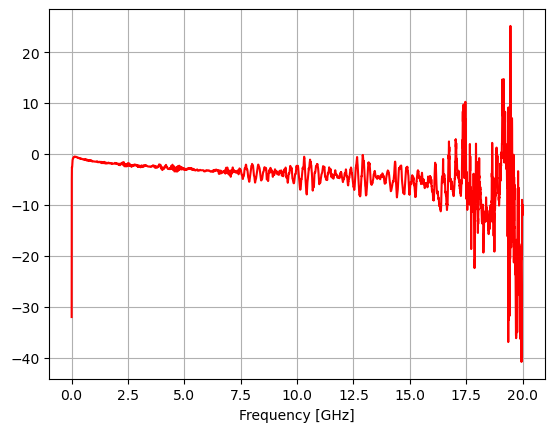

In [98]:
fghz = port1_corrected.f/1e9
plt.plot(fghz,port1_corrected.s_db[:,1,0],color="red")

#plt.xlim(0.3,10)
plt.grid()
#plt.ylim(-30,20)
#plt.title("All 6 Ports, Raw, dB")
plt.xlabel('Frequency [GHz]')
#plt.ylabel('$S_{11}$ [dB]')
#plt.legend(("Port 1","Port 2","Port 3","Port 4","Port 5","Port 6"))

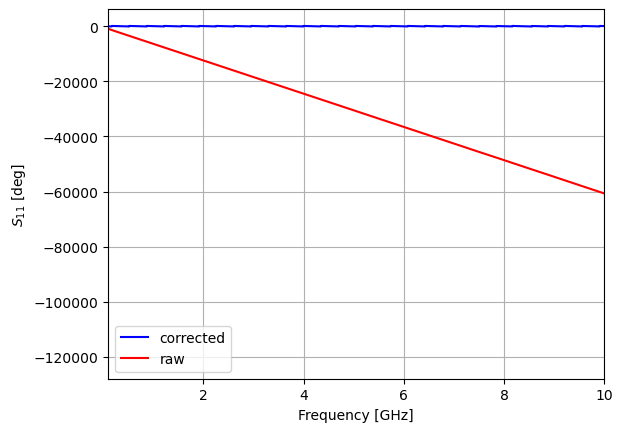

In [100]:
fghz = port1_corrected.f/1e9
plt.plot(fghz,port1_corrected.s_deg_unwrap[:,1,0],color="blue")
plt.xlabel('Frequency [GHz]')
fghz = port1_corrected.f/1e9
plt.plot(fghz,cold_thrus_measured['port1'].s_deg_unwrap[:,1,0],color="red")
plt.xlabel('Frequency [GHz]')
plt.legend(['corrected','raw'])
plt.xlabel('Frequency [GHz]')
plt.ylabel('$S_{11}$ [deg]')
plt.xlim(0.1,10)
plt.grid()

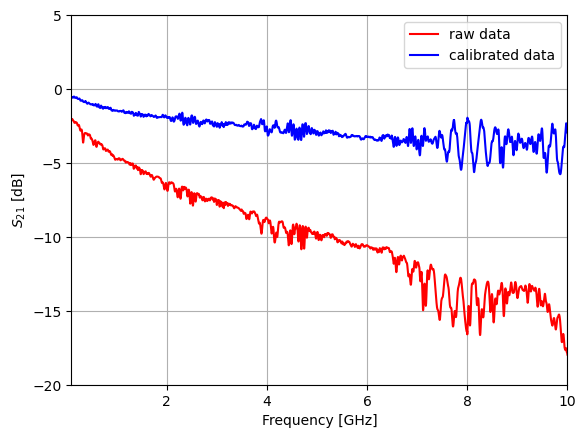

In [102]:

fghz = port1_corrected.f/1e9
plt.plot(fghz,cold_thrus_measured['port1'].s_db[:,1,0],color="red")
plt.plot(fghz,port1_corrected.s_db[:,1,0],color="blue")
plt.grid()
plt.xlabel('Frequency [GHz]')
plt.xlim(0.1,10)
plt.ylim(-20,5)
plt.ylabel('$S_{21}$ [dB]')
plt.legend(['raw data','calibrated data'])

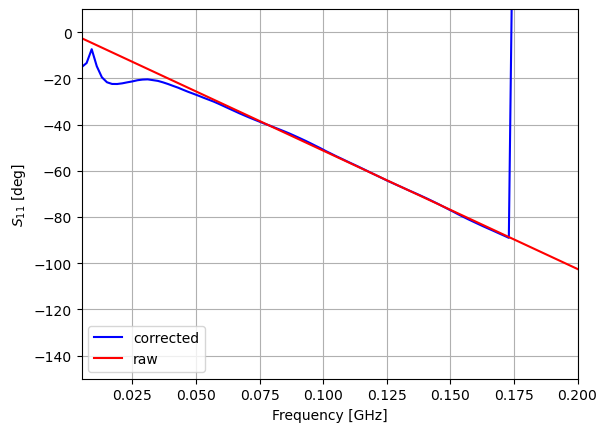

In [116]:
fghz = port1_corrected.f/1e9
plt.plot(fghz,port1_corrected.s_deg_unwrap[:,1,0],color="blue")
plt.xlabel('Frequency [GHz]')
fghz = port1_corrected.f/1e9
plt.plot(fghz,-512.5*fghz,color="red")
plt.xlabel('Frequency [GHz]')
plt.legend(['corrected','raw'])
plt.xlabel('Frequency [GHz]')
plt.ylabel('$S_{11}$ [deg]')
plt.xlim(0.005,0.2)
plt.ylim(-150,10)
plt.grid()

In [122]:
my_ideals_port1_phasedelay = [\
    cold_ideals_2port['ideal_port1_short'],
    cold_ideals_2port['ideal_port1_open'],
    cold_ideals_2port['ideal_port1_load'],
    cold_ideals_2port['idealthru_phasedelay']
]

In [124]:
cal_port1_phasedelay = rf.UnknownThru(\
    ideals = my_ideals_port1_phasedelay,
    measured = my_measured_cold_port1,
    )

In [126]:
cal_port1_phasedelay.run()

C:\Users\lfs\AppData\Local\Temp\1\ipykernel_16904\3977445444.py:1: UserWarning: No switch terms provided
  cal_port1_phasedelay.run()


In [128]:
port1_corrected_phasedelay = cal_port1_phasedelay.apply_cal(cold_thrus_measured['port1'])


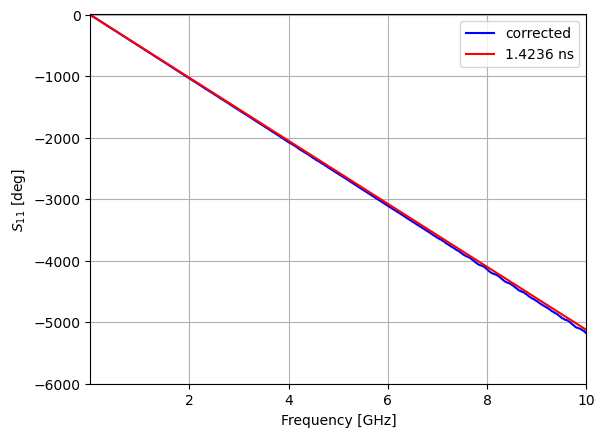

In [144]:
fghz = port1_corrected.f/1e9
plt.plot(fghz,port1_corrected_phasedelay.s_deg_unwrap[:,1,0],color="blue")
plt.xlabel('Frequency [GHz]')
fghz = port1_corrected.f/1e9
plt.plot(fghz,-512.5*fghz,color="red")
plt.xlabel('Frequency [GHz]')
plt.legend(['corrected','1.4236 ns'])
plt.xlabel('Frequency [GHz]')
plt.ylabel('$S_{11}$ [deg]')
plt.xlim(0.005,10)
plt.ylim(-6000,10)
plt.grid()

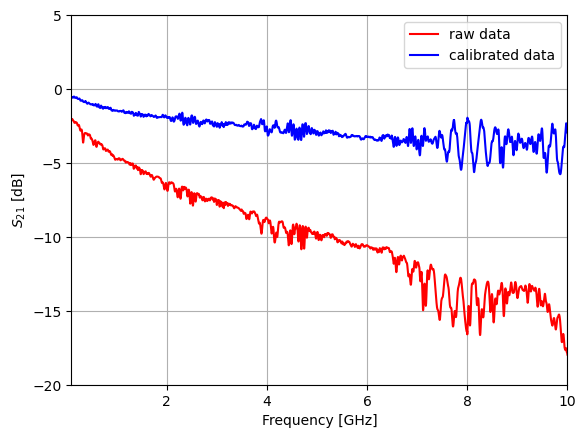

In [142]:
plt.plot(fghz,cold_thrus_measured['port1'].s_db[:,1,0],color="red")
plt.plot(fghz,port1_corrected_phasedelay.s_db[:,1,0],color="blue")
plt.grid()
plt.xlabel('Frequency [GHz]')
plt.xlim(0.1,10)
plt.ylim(-20,5)
plt.ylabel('$S_{21}$ [dB]')
plt.legend(['raw data','calibrated data'])

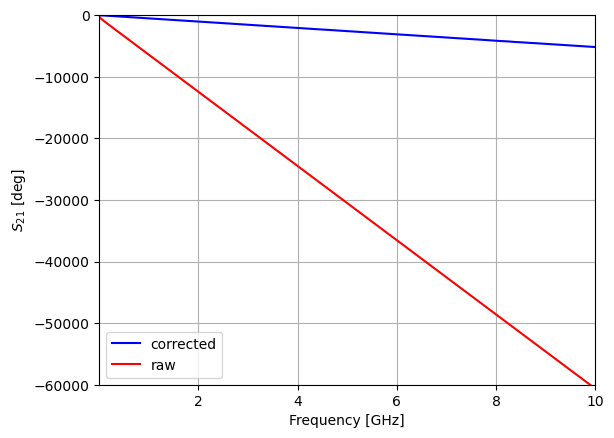

In [164]:
fghz = port1_corrected.f/1e9
plt.plot(fghz,port1_corrected_phasedelay.s_deg_unwrap[:,1,0],color="blue")
plt.plot(fghz,cold_thrus_measured['port1'].s_deg_unwrap[:,1,0],color="red")

plt.xlabel('Frequency [GHz]')
fghz = port1_corrected.f/1e9
plt.xlabel('Frequency [GHz]')
plt.legend(['corrected','raw'])
plt.xlabel('Frequency [GHz]')
plt.ylabel('$S_{21}$ [deg]')
plt.xlim(0.005,10)
plt.ylim(-60000,10)
plt.grid()

Text(0, 0.5, '$S_{21}$ [dB]')

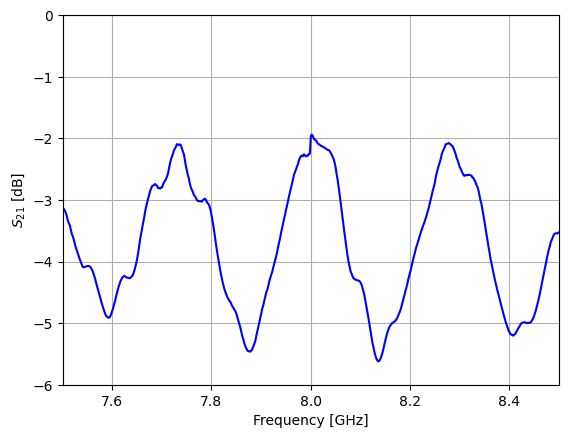

In [162]:
plt.plot(fghz,port1_corrected_phasedelay.s_db[:,1,0],color="blue")
plt.grid()
plt.xlabel('Frequency [GHz]')
plt.xlim(7.5,8.5)
plt.ylim(-6,0)
plt.ylabel('$S_{21}$ [dB]')


In [166]:
1/1.4236

0.7024445068839562